# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | birzai
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | puerto colombia
Processing Record 8 of Set 1 | heroica guaymas
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | caleta de carquin
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | new plymouth
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Se

Processing Record 42 of Set 4 | lindsay
Processing Record 43 of Set 4 | aykhal
Processing Record 44 of Set 4 | sinabang
Processing Record 45 of Set 4 | kailua-kona
Processing Record 46 of Set 4 | gaspe
Processing Record 47 of Set 4 | seguela
Processing Record 48 of Set 4 | vinales
Processing Record 49 of Set 4 | vernal
Processing Record 0 of Set 5 | bengkulu
Processing Record 1 of Set 5 | kihei
Processing Record 2 of Set 5 | alice springs
Processing Record 3 of Set 5 | homer
Processing Record 4 of Set 5 | nagqu
Processing Record 5 of Set 5 | benghazi
Processing Record 6 of Set 5 | soure
Processing Record 7 of Set 5 | singaraja
Processing Record 8 of Set 5 | muncar
Processing Record 9 of Set 5 | tamanrasset
Processing Record 10 of Set 5 | ormara
Processing Record 11 of Set 5 | kapuskasing
Processing Record 12 of Set 5 | invercargill
Processing Record 13 of Set 5 | gannan
Processing Record 14 of Set 5 | embi
Processing Record 15 of Set 5 | nadym
Processing Record 16 of Set 5 | salekhard


Processing Record 34 of Set 8 | rio grande
Processing Record 35 of Set 8 | shelbyville
Processing Record 36 of Set 8 | igrim
Processing Record 37 of Set 8 | queenstown
Processing Record 38 of Set 8 | velyka lepetykha
Processing Record 39 of Set 8 | aasiaat
Processing Record 40 of Set 8 | maranding
Processing Record 41 of Set 8 | ocos
Processing Record 42 of Set 8 | kawambwa
Processing Record 43 of Set 8 | pariaman
Processing Record 44 of Set 8 | kas
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | wuda
Processing Record 47 of Set 8 | buta
Processing Record 48 of Set 8 | taro
Processing Record 49 of Set 8 | keflavik
Processing Record 0 of Set 9 | ulladulla
Processing Record 1 of Set 9 | makoua
Processing Record 2 of Set 9 | sandakan
Processing Record 3 of Set 9 | port isabel
Processing Record 4 of Set 9 | vilyuchinsk
Processing Record 5 of Set 9 | skeldon
Processing Record 6 of Set 9 | arklow
Processing Record 7 of Set 9 | formosa do rio preto
Processing Record 8 of 

Processing Record 26 of Set 12 | ormond-by-the-sea
Processing Record 27 of Set 12 | namasuba
Processing Record 28 of Set 12 | mermoz boabab
Processing Record 29 of Set 12 | xining
Processing Record 30 of Set 12 | wanning
Processing Record 31 of Set 12 | kirs
Processing Record 32 of Set 12 | quatre cocos
Processing Record 33 of Set 12 | yanbu
Processing Record 34 of Set 12 | lawas
Processing Record 35 of Set 12 | soller
Processing Record 36 of Set 12 | thabazimbi
Processing Record 37 of Set 12 | buka
Processing Record 38 of Set 12 | port hedland
Processing Record 39 of Set 12 | kokopo
Processing Record 40 of Set 12 | yakakent
Processing Record 41 of Set 12 | al jawf
Processing Record 42 of Set 12 | kone
Processing Record 43 of Set 12 | polyarnyy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,birzai,56.2000,24.7500,35.87,86,6,8.70,LT,1697499774
1,port alfred,-33.5906,26.8910,60.19,94,85,8.75,ZA,1697499774
2,yellowknife,62.4560,-114.3525,45.41,94,75,8.05,CA,1697499775
3,arraial do cabo,-22.9661,-42.0278,73.36,88,75,18.41,BR,1697499775
4,port-aux-francais,-49.3500,70.2167,37.06,90,93,28.45,TF,1697499775


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,birzai,56.2000,24.7500,35.87,86,6,8.70,LT,1697499774
1,port alfred,-33.5906,26.8910,60.19,94,85,8.75,ZA,1697499774
2,yellowknife,62.4560,-114.3525,45.41,94,75,8.05,CA,1697499775
3,arraial do cabo,-22.9661,-42.0278,73.36,88,75,18.41,BR,1697499775
4,port-aux-francais,-49.3500,70.2167,37.06,90,93,28.45,TF,1697499775


In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,birzai,56.2000,24.7500,35.87,86,6,8.70,LT,1697499774
1,port alfred,-33.5906,26.8910,60.19,94,85,8.75,ZA,1697499774
2,yellowknife,62.4560,-114.3525,45.41,94,75,8.05,CA,1697499775
3,arraial do cabo,-22.9661,-42.0278,73.36,88,75,18.41,BR,1697499775
4,port-aux-francais,-49.3500,70.2167,37.06,90,93,28.45,TF,1697499775


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

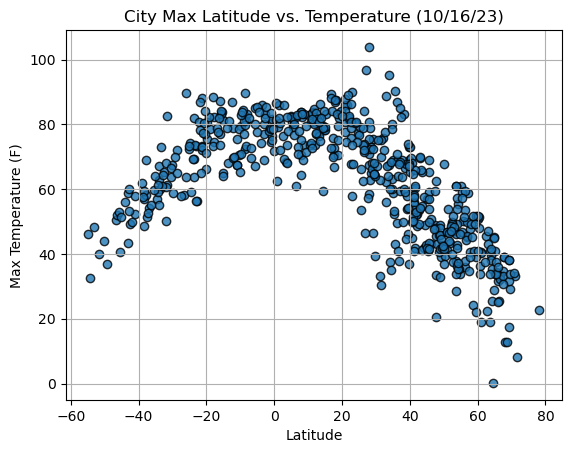

In [9]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, marker ="o", alpha=0.8, label="Cities")

plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

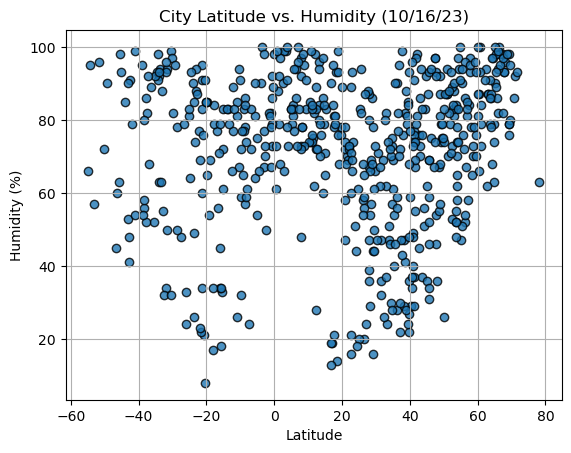

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, marker ="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

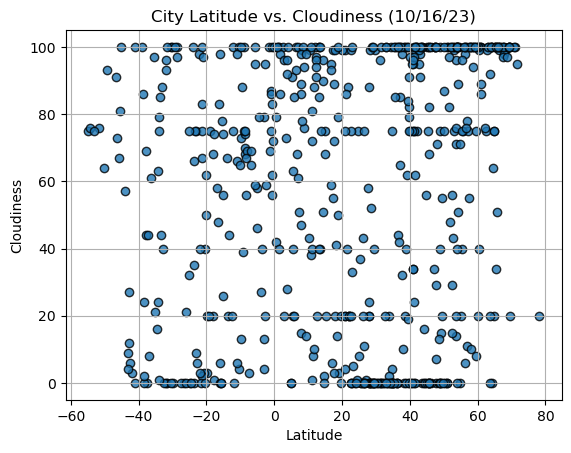

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, marker ="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

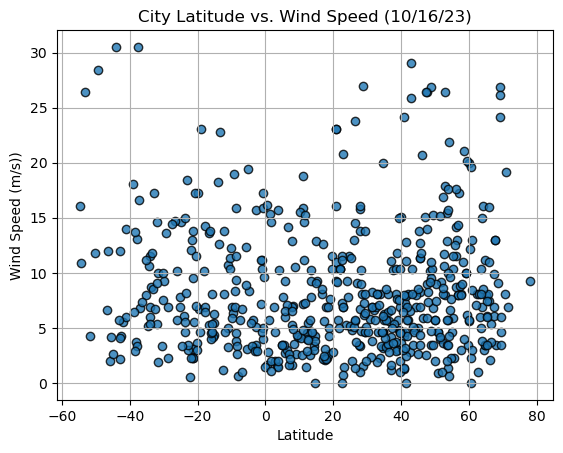

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, marker ="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def create_linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,(0,30),fontsize=13, color="red")
    print(f"the r-value is: {rvalue**2}")
    plt.show()
    return

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,birzai,56.2000,24.7500,35.87,86,6,8.70,LT,1697499774
2,yellowknife,62.4560,-114.3525,45.41,94,75,8.05,CA,1697499775
5,puerto colombia,10.9878,-74.9547,80.69,74,38,7.18,CO,1697499775
6,heroica guaymas,27.9333,-110.9000,103.89,47,20,13.80,MX,1697499776
8,petropavlovsk-kamchatsky,53.0452,158.6483,46.99,88,75,17.90,RU,1697499776


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,60.19,94,85,8.75,ZA,1697499774
3,arraial do cabo,-22.9661,-42.0278,73.36,88,75,18.41,BR,1697499775
4,port-aux-francais,-49.3500,70.2167,37.06,90,93,28.45,TF,1697499775
7,geraldton,-28.7667,114.6000,72.01,78,100,6.91,AU,1697499690
12,caleta de carquin,-11.0925,-77.6267,67.37,85,66,10.71,PE,1697499777


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.6808023703512828


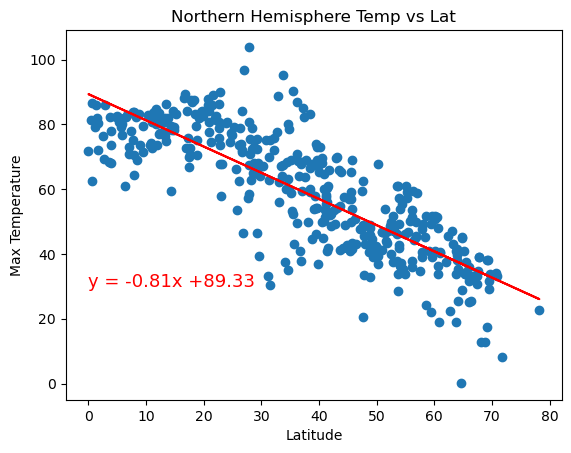

In [36]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere Temp vs Lat")
create_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])


the r-value is: 0.6465392424437064


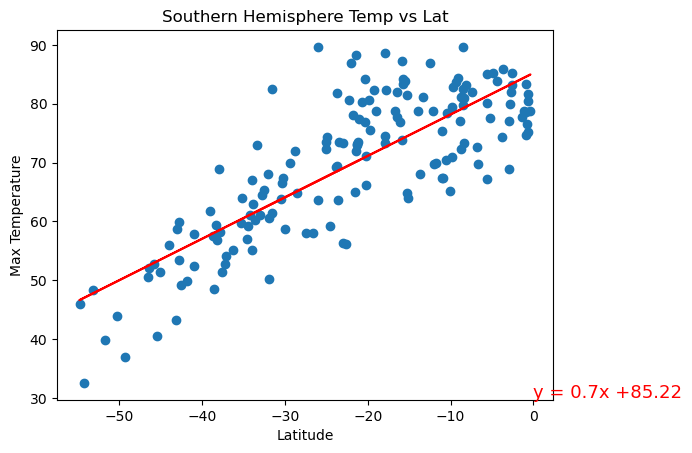

In [37]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere Temp vs Lat")
create_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For Northern Hemisphere Temperature, it seems to have a moderate decreasing correlation to the increasing Latitude. While the Southern Hemisphere Temperature has moderate increasing correlation to the increasing latitude.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.010954995249364413


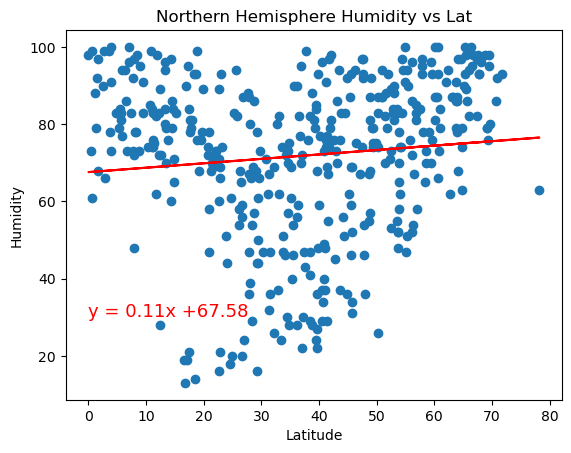

In [38]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Humidity vs Lat")
create_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

the r-value is: 0.0010441494244013017


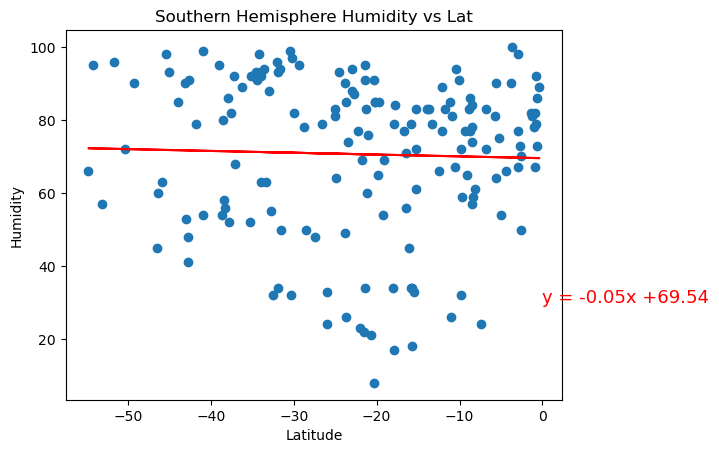

In [39]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Humidity vs Lat")
create_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For Northern Hemisphere Humidity, it seems to have no correlation to the increasing Latitude. Also, the Southern Hemisphere Humidity has no correlation to the increasing latitude.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.02607313224136573


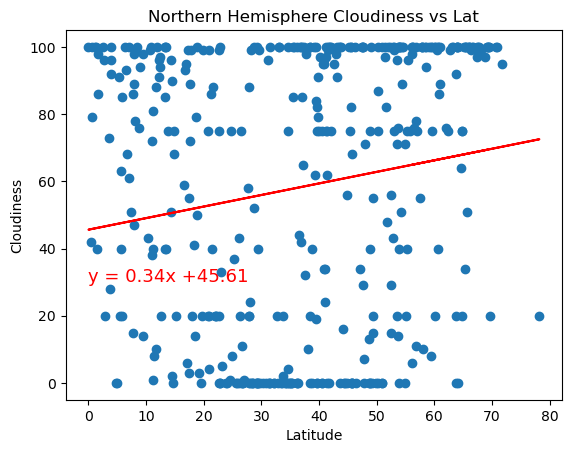

In [40]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Cloudiness vs Lat")
create_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

the r-value is: 0.008855922303597993


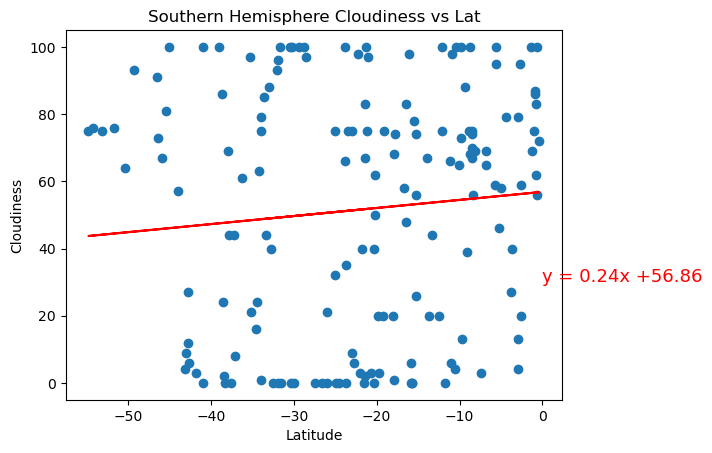

In [41]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Cloudiness vs Lat")
create_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
For Northern Hemisphere Cloudiness, it seems to have no correlation to the increasing Latitude. Also, the Southern Hemisphere Cloudiness ha no correlation to the increasing latitude.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.03197316285106614


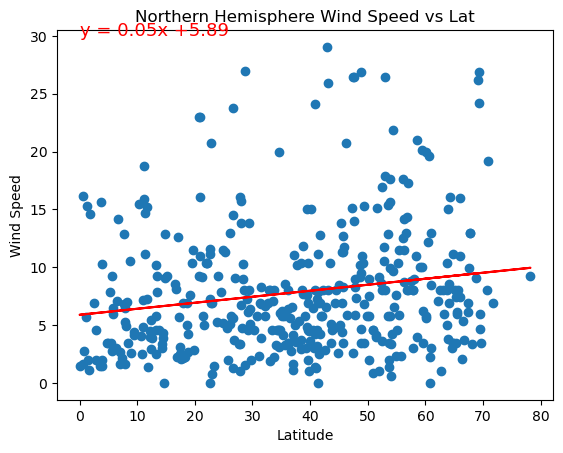

In [42]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Wind Speed vs Lat")
create_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

the r-value is: 0.026818189354375375


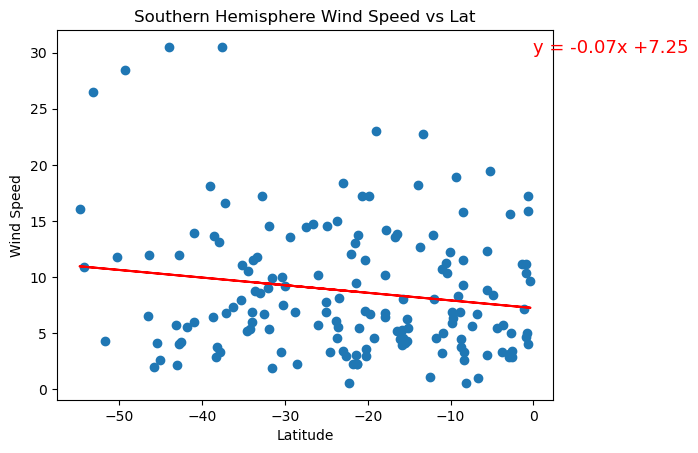

In [43]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Wind Speed vs Lat")
create_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

For Northern Hemisphere Windspeed, it seems to have a week increasing correlation to the increasing Latitude. While, the Southern Hemisphere Windspeed has no correlation to the increasing latitude.